# Linear regression model for NYC BnB 2019 data set

The first steps is to import the relevant fields in the notebook. In this case it is pandas, matplotlib and sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

Next we import the data in a variable called data set using the pandas method of reading csv files

In [2]:
data_set = pd.read_csv('AB_NYC_2019.csv')

Displaying the 5 rows of the data set to understand what it being looked at

In [4]:
data_set.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


The shows how many rows and colomns are in the table. 

In [5]:
data_set.shape

(48895, 16)

Now we can decide to plot the values that we are interested in and display them.

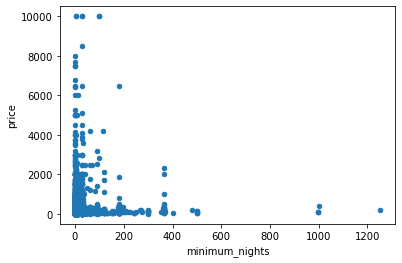

In [44]:
data_set.plot(kind = 'scatter',x = 'minimum_nights',y = 'price')
plt.show()

For this data set, we have chosen the mininum nights and number of reviews. Now we can make data framse with only those values and use them in the linear regression model we will set up.

In [31]:
min_nights = pd.DataFrame(data_set['minimum_nights'])
num_of_reviews = pd.DataFrame(data_set['number_of_reviews'])

The model will be a linear regression model but it can also be which ever model you decided to put it too. For now we will use linear regression.

In [32]:
l_model = linear_model.LinearRegression()
model = l_model.fit(min_nights,num_of_reviews)

Now that we have established the model we can extract the coefficients from the model, in this case these are the intercept and the gradient.

In [56]:
coeff_intercept_= pd.DataFrame(zip(model.coef_[0],model.intercept_))
coeff_intercept_.columns =['coefficient','intercept']
coeff_intercept_.head()

,coefficient,intercept
0,-0.174019,24.49781


We can evaluate how good the model is using the model score method. 

In [35]:
model.score(min_nights,num_of_reviews) # evaluates how good the model is

0.006418584390500026

In [40]:
min_nights_new = [[200]]
num_of_reviews_predict = model.predict(min_nights_new)
num_of_reviews_predict

array([[-10.30591365]])

In [49]:
correlation_frame=pd.DataFrame(data_set.corr())
correlation_frame.head(10)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000
